# Imports

In [38]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import plotly.express    as px
import matplotlib.pyplot as plt

from IPython.core.display import HTML
from geopy.geocoders      import Nominatim
from tabulate             import tabulate
from geopy                import distance
from geopy.distance       import great_circle

## Helper Functions

In [39]:
def jupyter_settings():
    %matplotlib inline
        
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = (20,15)
    plt.rcParams['font.size'] = 25
    
    display( HTML( '<style>.container { width:90% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.options.display.float_format = '{:,.2f}'.format
    pd.set_option( 'display.expand_frame_repr', False )
    np.set_printoptions(suppress=True)
    
    sns.set()
    sns.set_theme(style = 'darkgrid', font_scale = 2)
    sns.set_style("darkgrid")


In [40]:
jupyter_settings()

## Loading Data

In [41]:
df_raw = pd.read_csv(r'../datasets/raw/kc_house_data.csv')

# <font color='blue'>Data Description

In [42]:
df1=df_raw.copy()

## Rename Columns

In [43]:
# checking columns names
df1.columns # nothing to rename

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Data Dimension

In [44]:
print('Number of rows: {}' .format (df1.shape[0]))
print('Number of columns: {}' .format (df1.shape[1]))

Number of rows: 21613
Number of columns: 21


## Data Types

In [45]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.00",3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,"538,000.00",3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,"180,000.00",2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,"604,000.00",4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,"510,000.00",3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [46]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Check NA

In [47]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Fill out NA

## Change Variables Types

In [48]:
# changing 'date' type from OBJECT to DATE

# checking DATES types
print(df1[['date','yr_built','yr_renovated']].head(),'\n')
print(df1[['date','yr_built','yr_renovated']].dtypes)

# changing dtypes
df1['date']         = pd.to_datetime(df1['date'],         format='%Y-%m-%d')
# df1['yr_built']     = pd.to_datetime(df1['yr_built'],     format='%Y-%m-%d')
# df1['yr_renovated'] = pd.to_datetime(df1['yr_renovated'], format='%Y-%m-%d')

# checking DATES types
print("")
print(df1[['date','yr_built','yr_renovated']].dtypes)
df1[['date','yr_built','yr_renovated']].head()

              date  yr_built  yr_renovated
0  20141013T000000      1955             0
1  20141209T000000      1951          1991
2  20150225T000000      1933             0
3  20141209T000000      1965             0
4  20150218T000000      1987             0 

date            object
yr_built         int64
yr_renovated     int64
dtype: object

date            datetime64[ns]
yr_built                 int64
yr_renovated             int64
dtype: object


,date,yr_built,yr_renovated
0,2014-10-13,1955,0
1,2014-12-09,1951,1991
2,2015-02-25,1933,0
3,2014-12-09,1965,0
4,2015-02-18,1987,0


## Descriptive Statistics

In [49]:
num_df1 = df1.select_dtypes(include=['int64','float64'])
cat_df1 = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

### Numerical Attributes

In [50]:
num_df1.shape

(21613, 20)

In [51]:
# central tendendy - mean, median
ct1 = pd.DataFrame(num_df1.apply(np.mean)).T
ct2 = pd.DataFrame(num_df1.apply(np.median)).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_df1.apply(np.std)).T
d2 = pd.DataFrame(num_df1.apply(min)).T
d3 = pd.DataFrame(num_df1.apply(max)).T
d4 = pd.DataFrame(num_df1.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_df1.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_df1.apply(lambda x: x.kurtosis)).T

# concatenate 
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,"1,000,102.0","9,900,000,190.0","9,899,000,088.0","4,580,301,520.86","3,904,930,410.0","2,876,499,023.43",0.24,<bound method NDFrame._add_numeric_operations....
1,price,"75,000.0","7,700,000.0","7,625,000.0","540,088.14","450,000.0","367,118.7",4.02,<bound method NDFrame._add_numeric_operations....
2,bedrooms,0.0,33.0,33.0,3.37,3.0,0.93,1.97,<bound method NDFrame._add_numeric_operations....
3,bathrooms,0.0,8.0,8.0,2.11,2.25,0.77,0.51,<bound method NDFrame._add_numeric_operations....
4,sqft_living,290.0,"13,540.0","13,250.0","2,079.9","1,910.0",918.42,1.47,<bound method NDFrame._add_numeric_operations....
5,sqft_lot,520.0,"1,651,359.0","1,650,839.0","15,106.97","7,618.0","41,419.55",13.06,<bound method NDFrame._add_numeric_operations....
6,floors,1.0,3.5,2.5,1.49,1.5,0.54,0.62,<bound method NDFrame._add_numeric_operations....
7,waterfront,0.0,1.0,1.0,0.01,0.0,0.09,11.39,<bound method NDFrame._add_numeric_operations....
8,view,0.0,4.0,4.0,0.23,0.0,0.77,3.4,<bound method NDFrame._add_numeric_operations....
9,condition,1.0,5.0,4.0,3.41,3.0,0.65,1.03,<bound method NDFrame._add_numeric_operations....


### Categorical Attributes

In [52]:
cat_df1.shape # no attributes

(21613, 0)

# <font color='blue'> Variable Filtering 

In [53]:
df2=df1.copy()

In [54]:
df2 = df2.drop (['view', 'sqft_living15','sqft_lot15'], axis=1)


# view          	An index from 0 to 4 of how good the view of the property was

# sqft_living15 	The square footage of interior housing living space for the nearest 15 neighbors
# sqft_lot15    	The square footage of the land lots of the nearest 15 neighbors

In [55]:
# checking properties 'sqft_living' by number of bedrooms

print(df2[['bedrooms','sqft_living']].groupby(['bedrooms']).mean().sort_values('sqft_living', ascending=True))
print(df2[['id','bedrooms']].groupby(['bedrooms']).count(),'\n')

df2 = df2[ (df2['bedrooms']!=0) & (df2['bedrooms']!=11) & (df2['bedrooms']!=33) ]

          sqft_living
bedrooms             
1              884.61
2            1,239.75
33           1,620.00
0            1,707.85
3            1,805.84
4            2,554.65
11           3,000.00
5            3,047.55
6            3,284.34
10           3,706.67
9            3,775.00
8            3,800.00
7            3,974.21
            id
bedrooms      
0           13
1          199
2         2760
3         9824
4         6882
5         1601
6          272
7           38
8           13
9            6
10           3
11           1
33           1 



# Feature Engineering

In [56]:
df3 = df2.copy()

## Mind Map Hypothesis

## Creating Hypothesis

1. Properties that have water view are 20% more expensive. # usar group bins do DS em Prod. 4.2.2 EDa > Bivariate >
2. Properties with basements have higher grade
3. Properties with basements have bigger 'sqft_living'
4. Properties with basements are 15% more expensive
5. Properties with more than 2 bathrooms are 20% more expensive
8. Properties with more than 2 bedrooms are 25% more expensive
9. Properties with more than 1 floor are 10% more expensive
11. Properties that were not renovated are 40% cheaper
10. Properties that were not renovated in the last 5 years are 15% cheaper
12. Properties that were built in the last 5 years are cheaper than properties that were renovated in the last 5 years
13. Most properties (+50%) became available during summer/spring
14. Properties available during summer/spring are 20% more expensive.
14. More than half properties are localized in a xkm radio from the lake.

## Features Creation

In [57]:
## getting data from API in a separate dataframe

# query
df3['query'] = df3[['lat','long']].apply(lambda x: str(x['lat']) + ',' + str(x['long']), axis=1)
df_geodata = df3[['id', 'query']].copy()

# creating empty columns
df_geodata['place_id']      = "NA"
df_geodata['road']          = 'NA'
df_geodata['house_number']  = 'NA'
df_geodata['neighbourhood'] = 'NA'
df_geodata['city']          = 'NA'
df_geodata['county']        = 'NA'
df_geodata['state']         = 'NA'
df_geodata['postcode']      = 'NA'


# auxiliar variable that helps localizing the adresses
geolocator = Nominatim (user_agent = 'geodata_api') 

# loop for
for i in range (df_geodata.shape[0]):
    
    print ('Loop: {} / {}'.format(i, df_geodata.shape[0]))
    
    # api request
    response = geolocator.reverse(df3.loc[i,'query']) # standard variable for API responses // 'reverse' returns an address by location point
    
    # populating data
    if 'place_id'in response.raw:
        df_geodata.loc[i, 'place_id']      = response.raw['place_id']
    if 'road'in response.raw['address']:
        df_geodata.loc[i, 'road']          = response.raw['address']['road']
    if 'house_number'in response.raw['address']:
        df_geodata.loc[i, 'house_number']  = response.raw['address']['house_number']
    if 'neighbourhood'in response.raw['address']:
        df_geodata.loc[i, 'neighbourhood'] = response.raw['address']['neighbourhood']
    if 'city'in response.raw['address']:
        df_geodata.loc[i, 'city']          = response.raw['address']['city']
    if 'county'in response.raw['address']:
        df_geodata.loc[i,'county']         = response.raw['address']['county']
    if 'state'in response.raw['address']:
        df_geodata.loc[i,'state']          = response.raw['address']['state']
    if 'postcode'in response.raw['address']:
        df_geodata.loc[i,'postcode']       = response.raw['address']['postcode']


        
        
# # getting geodata temporarily
# df_geodata = pd.read_csv('../datasets/interim/api_geodata.csv')

# df3 = pd.merge(df3, df_geodata, how='left', on='id')
# df3.head()

# # saving df_geodata
# # df_geodata = pd.to_csv('../datasets/interim/api_geodata_realstate.csv')

Loop: 0 / 21598
Loop: 1 / 21598
Loop: 2 / 21598
Loop: 3 / 21598
Loop: 4 / 21598
Loop: 5 / 21598
Loop: 6 / 21598
Loop: 7 / 21598
Loop: 8 / 21598
Loop: 9 / 21598
Loop: 10 / 21598
Loop: 11 / 21598
Loop: 12 / 21598
Loop: 13 / 21598
Loop: 14 / 21598
Loop: 15 / 21598
Loop: 16 / 21598
Loop: 17 / 21598
Loop: 18 / 21598
Loop: 19 / 21598
Loop: 20 / 21598
Loop: 21 / 21598
Loop: 22 / 21598
Loop: 23 / 21598
Loop: 24 / 21598
Loop: 25 / 21598
Loop: 26 / 21598
Loop: 27 / 21598
Loop: 28 / 21598
Loop: 29 / 21598
Loop: 30 / 21598
Loop: 31 / 21598
Loop: 32 / 21598
Loop: 33 / 21598
Loop: 34 / 21598
Loop: 35 / 21598
Loop: 36 / 21598
Loop: 37 / 21598
Loop: 38 / 21598
Loop: 39 / 21598
Loop: 40 / 21598
Loop: 41 / 21598
Loop: 42 / 21598
Loop: 43 / 21598
Loop: 44 / 21598
Loop: 45 / 21598
Loop: 46 / 21598
Loop: 47 / 21598
Loop: 48 / 21598
Loop: 49 / 21598
Loop: 50 / 21598
Loop: 51 / 21598
Loop: 52 / 21598
Loop: 53 / 21598
Loop: 54 / 21598
Loop: 55 / 21598
Loop: 56 / 21598
Loop: 57 / 21598
Loop: 58 / 21598
Loop: 5

Loop: 462 / 21598
Loop: 463 / 21598
Loop: 464 / 21598
Loop: 465 / 21598
Loop: 466 / 21598
Loop: 467 / 21598
Loop: 468 / 21598
Loop: 469 / 21598
Loop: 470 / 21598
Loop: 471 / 21598
Loop: 472 / 21598
Loop: 473 / 21598
Loop: 474 / 21598
Loop: 475 / 21598
Loop: 476 / 21598
Loop: 477 / 21598
Loop: 478 / 21598
Loop: 479 / 21598
Loop: 480 / 21598
Loop: 481 / 21598
Loop: 482 / 21598
Loop: 483 / 21598
Loop: 484 / 21598
Loop: 485 / 21598
Loop: 486 / 21598
Loop: 487 / 21598
Loop: 488 / 21598
Loop: 489 / 21598
Loop: 490 / 21598
Loop: 491 / 21598
Loop: 492 / 21598
Loop: 493 / 21598
Loop: 494 / 21598
Loop: 495 / 21598
Loop: 496 / 21598
Loop: 497 / 21598
Loop: 498 / 21598
Loop: 499 / 21598
Loop: 500 / 21598
Loop: 501 / 21598
Loop: 502 / 21598
Loop: 503 / 21598
Loop: 504 / 21598
Loop: 505 / 21598
Loop: 506 / 21598
Loop: 507 / 21598
Loop: 508 / 21598
Loop: 509 / 21598
Loop: 510 / 21598
Loop: 511 / 21598
Loop: 512 / 21598
Loop: 513 / 21598
Loop: 514 / 21598
Loop: 515 / 21598
Loop: 516 / 21598
Loop: 517 

KeyError: 875

In [21]:
# seasons of the year

def season_from_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

df3['season'] = df3['date'].map(season_from_date)
df3[['date','season']].head()

,date,season
0,2014-10-13,autumn
1,2014-12-09,autumn
2,2015-02-25,winter
3,2014-12-09,autumn
4,2015-02-18,winter


In [22]:
# radius from lake

# radius
radius = 16 # in km

# lake infos
lake_center = [{'lat':47.640883, 'long':-122.259250}]  
lake_tuple = 47.640883, -122.259250
#tuple(lake_center[0].values())


# distance from Lake
df3['dist_fromlake'] = df3['query'].apply(lambda x: great_circle(lake_tuple, x).km)

df3[['query','dist_fromlake']].sample(5) 

,query,dist_fromlake
9268,"47.7073,-122.07",15.98
17858,"47.7075,-122.336",9.38
13617,"47.6729,-122.373",9.23
15173,"47.6591,-122.27",2.18
1799,"47.6878,-122.215",6.18


In [23]:
# mean price by zipcode
a = df3[['price','zipcode']].groupby('zipcode').mean().reset_index().rename(columns={'price': 'mean_price_zipcode'})
a.head()

df3 = pd.merge(df3, a, on='zipcode', how='left')
df3[['id', 'price', 'zipcode', 'mean_price_zipcode']].sample(5)

,id,price,zipcode,mean_price_zipcode
17603,6610000591,"1,205,000.00",98107,"578,489.66"
4742,7631800025,"1,035,000.00",98166,"459,580.58"
11334,685000160,"770,000.00",98004,"1,357,759.77"
14062,866400040,"540,000.00",98034,"521,599.65"
10672,7202350310,"476,000.00",98053,"678,890.77"


In [24]:
# decision: buy x hold

df3['decision'] = df3[['price', 'mean_price_zipcode', 'condition']].apply(lambda x: 0 if (x['price'] > x['mean_price_zipcode']) 
                                                                               else 1 if ((x['price'] <= x['mean_price_zipcode']) & (x['condition']>=3))
                                                                               else 2, axis=1) 
                                                                        
                                                             
df3[['id', 'zipcode', 'price', 'mean_price_zipcode', 'condition', 'decision']].sample(5)
# id | zipcode | preço do imovel | preço da mediana | condição | status s/n

,id,zipcode,price,mean_price_zipcode,condition,decision
1007,1455600030,98125,"645,000.00","467,786.68",3,0
15848,3288300920,98034,"463,000.00","521,599.65",4,1
6084,2781270440,98038,"241,000.00","366,566.19",3,1
12403,4310702440,98103,"355,000.00","585,274.98",3,1
8319,4038700220,98008,"610,000.00","645,507.38",4,1


In [25]:
# sale price suggestion

df3['sale_price_suggestion'] = df3[['price', 'mean_price_zipcode', 'condition']].apply(lambda x: 0 if (x['price'] > x['mean_price_zipcode']) 
                                                                                            else x['price']*1.3 if ((x['price'] <= x['mean_price_zipcode']) & (x['condition']>=3))
                                                                                            else x['price']*1.1, axis=1) 

df3[df3['condition']==2][['id', 'zipcode', 'price', 'mean_price_zipcode', 'condition', 'decision', 'sale_price_suggestion']].sample(5)

,id,zipcode,price,mean_price_zipcode,condition,decision,sale_price_suggestion
9878,2568300045,98125,"649,950.00","467,786.68",2,0,0.00
1041,1498302774,98144,"271,310.00","592,321.90",2,2,"298,441.00"
19691,9485920120,98042,"290,000.00","311,087.83",2,2,"319,000.00"
15087,522039106,98070,"160,000.00","485,773.92",2,2,"176,000.00"
17328,3222059007,98030,"370,000.00","293,987.11",2,0,0.00


In [26]:
# expected profit
df3['expected_profit'] = df3[['price', 'sale_price_suggestion']].apply(lambda x: 0 if x['sale_price_suggestion']==0
                                                                                 else (x['sale_price_suggestion'] - x['price']), axis=1) 

df3[['id', 'zipcode', 'price', 'mean_price_zipcode', 'condition', 'decision', 'sale_price_suggestion', 'expected_profit']].sample(5)

,id,zipcode,price,mean_price_zipcode,condition,decision,sale_price_suggestion,expected_profit
3615,3342700371,98056,"539,950.00","419,436.74",4,0,0.00,0.00
14082,8122100355,98126,"550,000.00","423,986.17",3,0,0.00,0.00
15823,1732801150,98119,"2,300,000.00","849,448.02",4,0,0.00,0.00
1622,1250203335,98144,"1,050,000.00","592,321.90",3,0,0.00,0.00
15034,2420069604,98022,"255,000.00","315,709.30",3,1,"331,500.00","76,500.00"


# EDA

In [27]:
df4=df3.copy()

In [28]:
num_df4 = df4.select_dtypes(include=['int64','float64'])
cat_df4 = df4.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

## <font color='blue'>Univariate Analysis

### Response Variable

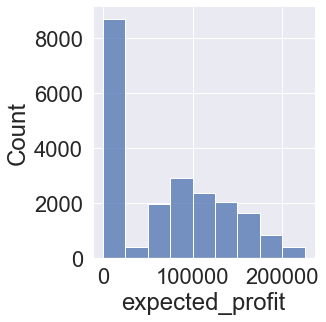

In [29]:
bin_groups = list(np.arange(0,250000,25000))
sns.displot(df4['expected_profit'], bins=bin_groups, legend=True);

### Numerical Variables

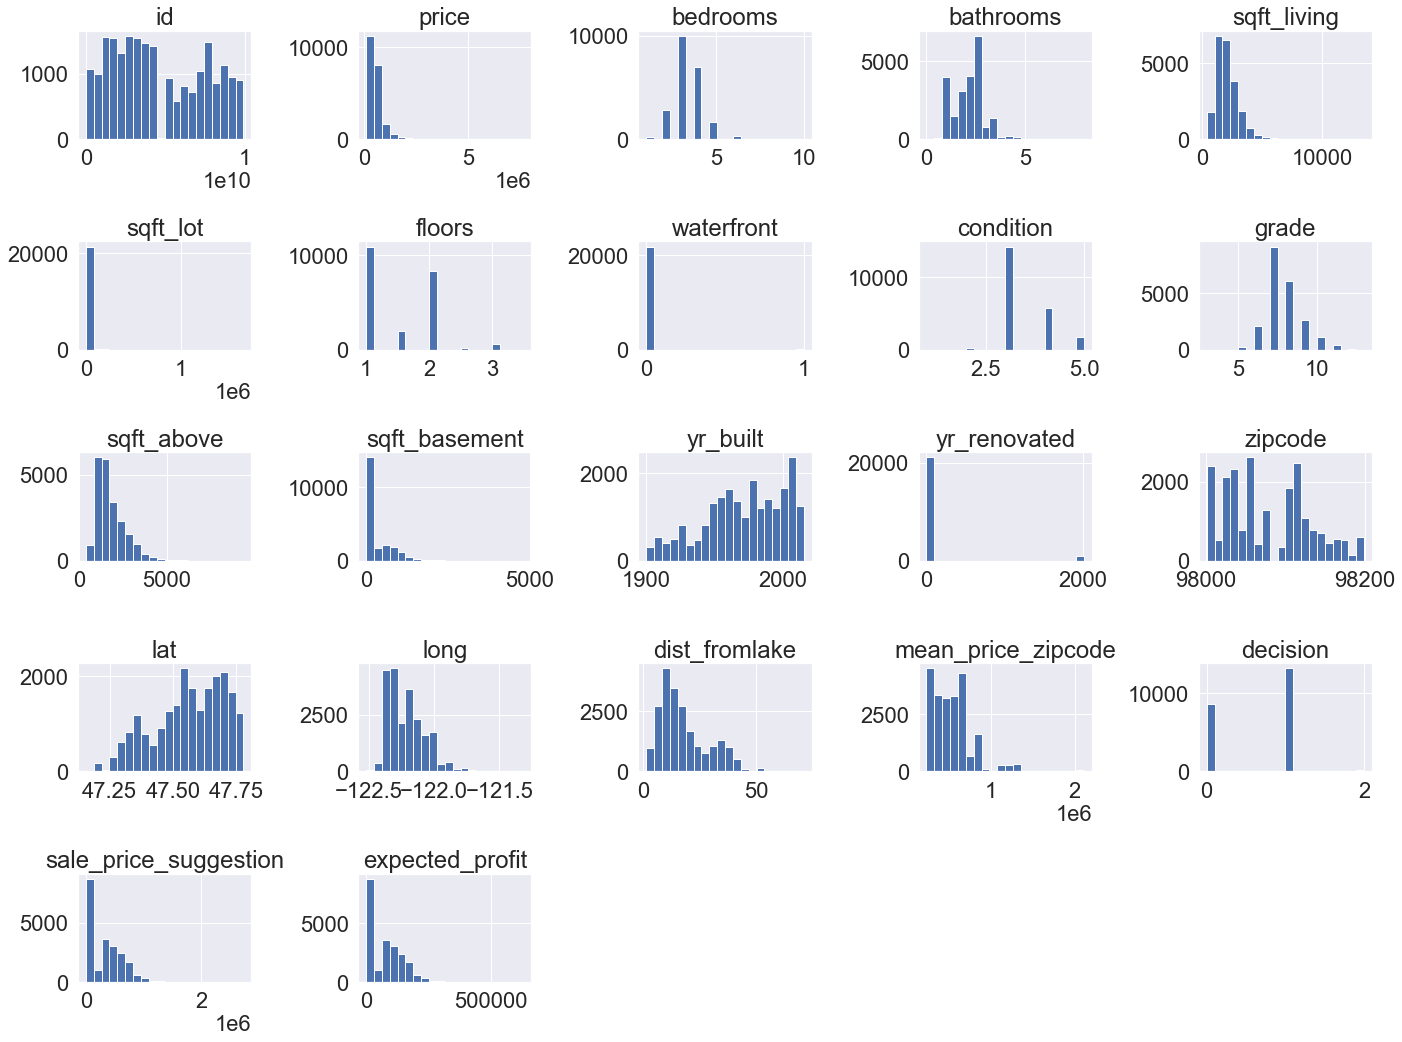

In [30]:
num_df4.hist(bins=20);
plt.tight_layout() 

### Categorical Variables

In [31]:
cat_df4.shape

(21954, 8)

## <font color='red'> Bivariate Analysis

In [32]:
print('Hypothesis Resume \n\n')
tab = [ ['Hypothesis', 'Conclusion', 'Relevance'],
        ['H1','False','Low'],
        ['H2','False','Medium'],
        ['H3','False','Medium'],
        ['H4','False','Low'],
        ['H5','False','Low'],
        ['H6','False','Low'],
        ['H7','False','Low'],
        ['H8','False','Low'],
        ['H9','False','High'],
        ['H10','True','High'],
        ['H11','True','High'],
        ['H12','True','High'],
      ]

print(tabulate(tab, headers = 'firstrow'))

Hypothesis Resume 


Hypothesis    Conclusion    Relevance
------------  ------------  -----------
H1            False         Low
H2            False         Medium
H3            False         Medium
H4            False         Low
H5            False         Low
H6            False         Low
H7            False         Low
H8            False         Low
H9            False         High
H10           True          High
H11           True          High
H12           True          High


1. Properties that have water view are 20% more expensive. # usar group bins do DS em Prod. 4.2.2 EDa > Bivariate >
2. Properties with basements have higher grade
3. Properties with basements have bigger 'sqft_living'
4. Properties with basements are 15% more expensive
5. The mean properties price vary according to zipcode > nao tem valor base, não é hipotese
6. More than half properties are localized in a xkm radio from the lake
7. Properties with more than 2 bathrooms are 20% more expensive
8. Properties with more than 2 bedrooms are 25% more expensive
9. Properties with more than 1 floor are 10% more expensive
10. Properties that were not renovated are 40% cheaper
10. Porperties that were not renovated in the last 5 years are 15% cheaper
11. Properties that were built in the last 5 years are cheaper than properties that were renoveted in the last 5 years

## Multivatiate Analysis

### Numerical Attributes

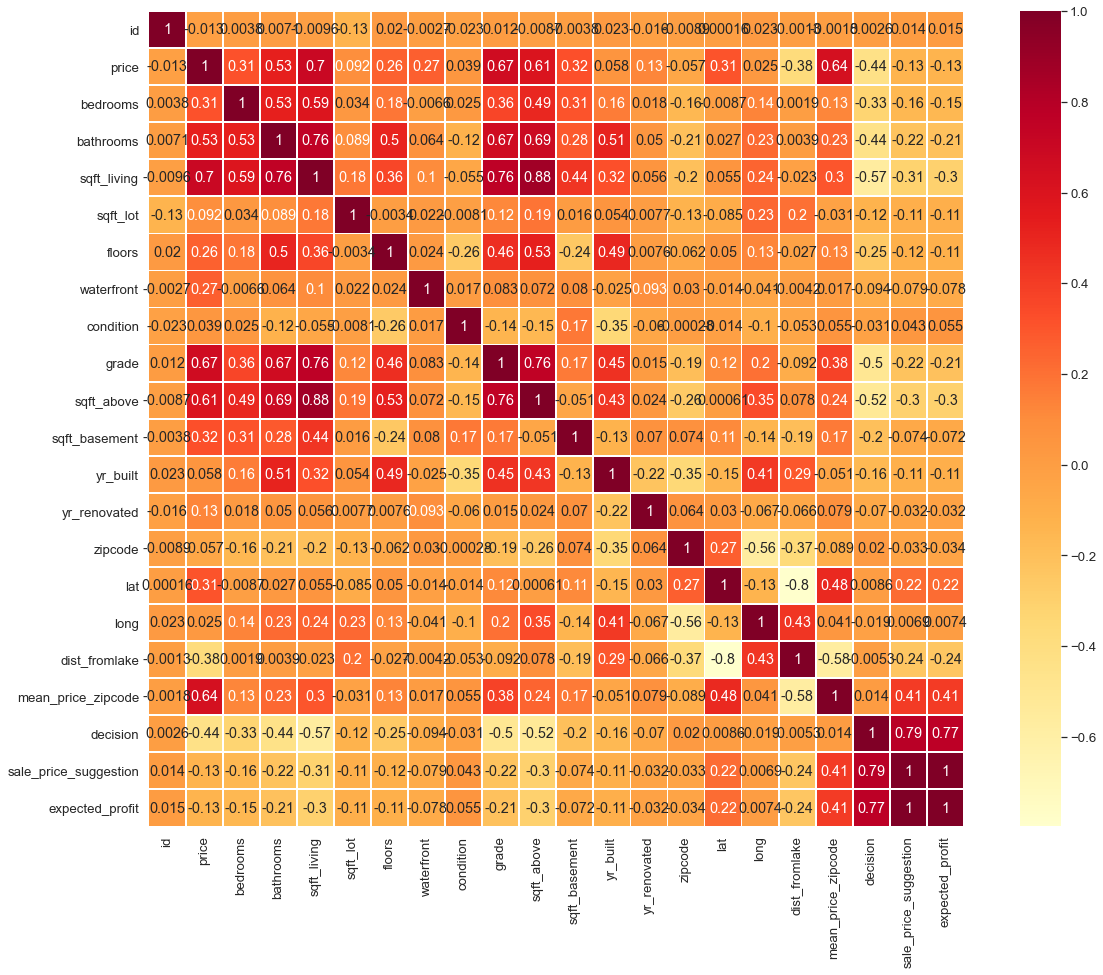

In [33]:
correlation = num_df4.corr(method='pearson')
sns.set(font_scale=1.2)
sns.heatmap(correlation, cmap='YlOrRd', annot=True, 
            annot_kws= {'fontsize':'medium'},
            linewidths=0.8, square=True );

### Categorical Attributes

In [34]:
cat_df4.shape

(21954, 8)

# Conclusion and Visualization

In [35]:
df5=df4.copy()

In [36]:
df5.dtypes

id                                int64
date                     datetime64[ns]
price                           float64
bedrooms                          int64
bathrooms                       float64
sqft_living                       int64
sqft_lot                          int64
floors                          float64
waterfront                        int64
condition                         int64
grade                             int64
sqft_above                        int64
sqft_basement                     int64
yr_built                          int64
yr_renovated                      int64
zipcode                           int64
lat                             float64
long                            float64
query                            object
road                             object
house_number                     object
neighbourhood                    object
city                             object
county                           object
state                            object


In [37]:



# ======== Quais os imóveis que a House Rocket deveria comprar e por qual preço?
#          tabela / Relatório com sugestão de compra com valor recomendados
# Agrupar dados por região
# Dentro de cada região, encontrar a mediana do preço de imóveis
# Sugerir que imóveis que estão abaixo do preço mediano de cada região e que estejam em boas condições sejam comprados
# 			Exemplo:
# 			id | zipcode | preço do imovel | preço da mediana | condição | status s/n




# ======== Uma vez comprado, qual o melhor momento para vendê-lo e por qual preço?
#          tabela / Relatório com as sugestões de venda com valor recomendado
# Agrupar dados por região e por sazonalidade (summer, winter)
# Dentro de cada região e sazonalidade, calcular a mediana do preço
# Condição de venda:
# 				- se o preço da compra for maior que a mediana da região + sazonalidade, o preço da venda será igual a compra + 10%,
# - se o preço da compra for menor que a mediana da região + sazonalidade, o preço da venda será igual a compra + 30%
# Exemplo:
# 		id | zipcode | season / pç do imovel | pç da mediana | pç compra / pç venda / lucro




